# __init__.py 의 용도 #

__init__.py 파일은 해당 디렉터리가 패키지의 일부임을 알려주는 역할을 한다. 만약 game, sound, graphic 등 패키지에 포함된 디렉터리에 __init__.py 파일이 없다면 패키지로 인식되지 않는다.

### ※ 주의 ###
python3.3 버전부터는 __init__.py 파일이 없어도 패키지로 인식한다(PEP 420). 하지만 하위 버전 호환을 위해 __init__.py 파일을 생성하는 것이 안전한 방법이다.

위 파일들은 하나의 경로에 하나의 파일로 존재합니다.예를들어 아래와 같이 존재합니다.

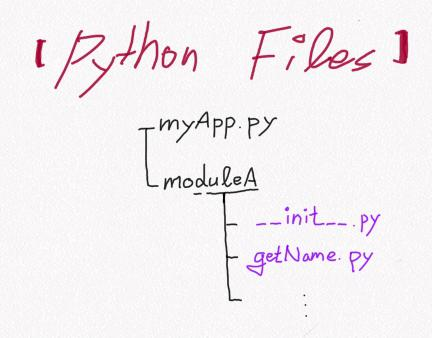

위 그림은 myApp.py라는 파일이 존재하고 경로 moduleA가 있는 경우를 나타냅니다. 이때 moduleA 안에는__init__.py파일이 존재하게됩니다.

이들의 역할은 파일이 위치한 경로를 패키지 모듈처럼 사용할 수 있도록 해주는 매우 중요한 기능을 수행합니다. 쉽게 말하면 우리가 패키지의 모듈을 추가할때 사용하는 from, import를 이 경로에 사용할 수 있다는 점입니다. 만약 이런 기능이 없다면 모듈을 찾는 경로를 config에 설정해야만 사용할 수 있어 매우 번거롭죠. 만약 해당 경로에 위치한 파일 getName.py을 import하는 경우 아래처럼 쓸 수 있을 것입니다.

In [ ]:
from moduleA import getName

다른 예시를 들어보자.

In [ ]:
from game.sound import *
echo.echo_test()
Traceback (most recent call last):

In [ ]:
    File "<stdin>", line 1, in <module>
NameError: name 'echo' is not defined

뭔가 이상하지 않은가? 분명 game.sound 패키지에서 모든 것(*)을 import하였으므로 echo 모듈을 사용할 수 있어야 할 것 같은데 echo라는 이름이 정의되지 않았다는 이름 오류(NameError)가 발생했다.

이렇게 특정 디렉터리의 모듈을 *를 사용하여 import할 때에는 다음과 같이 해당 디렉터리의 __init__.py 파일에 __all__ 변수를 설정하고 import할 수 있는 모듈을 정의해 주어야 한다.

In [ ]:
# C:/doit/game/sound/__init__.py
__all__ = ['echo']

여기에서 __all__이 의미하는 것은 sound 디렉터리에서 * 기호를 사용하여 import할 경우 이곳에 정의된 echo 모듈만 import된다는 의미이다.

※ 착각하기 쉬운데 from game.sound.echo import * 는 __all__과 상관없이 무조건 import된다. 이렇게 __all__과 상관없이 무조건 import되는 경우는 from a.b.c import * 에서 from의 마지막 항목인 c가 모듈인 경우이다.

위와 같이 __init__.py 파일을 변경한 후 위 예제를 수행하면 원하던 결과가 출력되는 것을 확인할 수 있다.

In [ ]:
from game.sound import *
echo.echo_test()

echo

### 해당 경로에 공통 사용되는 기능 및 모듈 사용하기

맨 위의 moduleA에 위치한 __init__.py에는 공통으로 적용 가능한 기능이나 모듈을 포함할 수 있습니다. 예를들어 해당 경로의 위치한 모든 python 파일들이 동일한 baseAll을 필요로하여 각각 아래처럼 선언된 경우 이를 이 곳에 위치시키면 한번만 선언함으로서 모두 같은 모듈을 사용하게됩니다.

In [ ]:
! moduleA/a.py
import baseAll

! moduleA/b.py
import baseAll

각각 선언된 import를 삭제 후 __init__.py에 한번만 선언하여 사용하면 더 적은 코드를 사용할 수 있죠.

! moduleA/__init__.py
import baseAll

이제 해당 경로의 모든 파일들은 공통으로 baseAll을 사용할 수 있게됩니다.